In [1]:
# Imports
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
# Quandl API Key
quandl.ApiConfig.api_key = "siQmAzTryxxsvqQk6s1g"

# Get Data
# NOTE: You want to find data that follows a generally linear trend.
df = quandl.get("WIKI/AMZN")

In [3]:
# Print head of data
# df.head()

# Only relevent data is 'Adjusted Close'
# Note: May need to change below line based on the data you are working with
df = df[["Adj. Close"]]

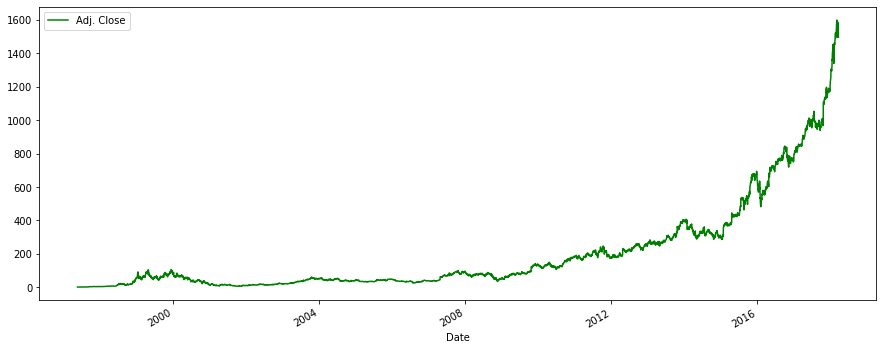

In [4]:
# Plot Data

df['Adj. Close'].plot(figsize=(15,6),color='g')
plt.legend(loc="upper left")
plt.show()

In [6]:
forecast = 30 # days in future that you are making predictions on
# Create prediction with data units shifted 30 days up
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

# x data is features
X = np.array(df.drop(["Prediction"], 1))
# Want to standardize the stock data, so we can do this
# Set mean to 0 and sd of array to 1
X = preprocessing.scale(X)

# Split into new arrays
# Just the last 30 days of the data set
X_forecast = X[-forecast:]
# All but the last 30 days
X = X[:-forecast]

y = np.array(df["Prediction"])
# All but the last 30 days
y = y[:-forecast]

In [14]:
# Split data into training data (80%) and testing data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize linear regression model over year
# Find line of best fit that minimizes distance to points on plt.plot(X, y)
clf = LinearRegression() # Classifier
# Find line of best fit
clf.fit(X_train, y_train)

# Calculate confidence score -- want a confidence close to 1
confidence = clf.score(X_test, y_test)
# print(confidence)

# Find predicted values by passing X_forecast into predict()
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1496.88003505 1535.63275228 1546.99130733 1533.12984006 1553.98037155
 1569.43267286 1571.38409595 1587.54696981 1610.8261746  1600.25243101
 1600.75089234 1580.60032783 1587.81210881 1612.58669761 1627.46629867
 1635.27199103 1642.54740537 1671.21423478 1691.89507731 1681.06680027
 1684.05756827 1674.85194196 1663.56762583 1635.1977521  1679.29567171
 1674.36408618 1634.3174906  1582.83810105 1646.78962948 1584.41832953]


(17282.0, 18029.5)

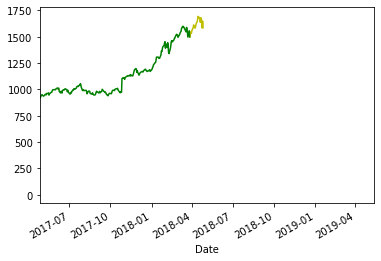

In [24]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color="y")
df['Adj. Close'].plot(color="g")
# Shift starting date till 2017 to see a more zoomed in portion
plt.xlim(xmin=datetime.date(2017, 4, 26))